In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F306%2F666%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240501%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240501T071950Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D31fb52f9deff1d8fcd7e5567e343fd2e8e8cb9ce0c67fadc855d1267faaf3fe2928ddf0b15e557116f41be5a5022f47eadb8a5d08567657ff1ec72f431da97fc0da8adf9e913f89c62e1c3ac8d8a69f234670c03f038a3d00ceb825dce9a3de54ba6ecb5e66bb65674d029b83da4713c849dc3300312a259b75ad4feaf83bca3187adb6dea9f443226be047282ebfe42a507068ba2f82d1827cf60a807869627d1e82a8f04c6905669184dd540dfb0b9f1c05adfc5066234b79afa3c55aefe3118ad1dacf5274f2e8da5c4a5466fd9787fde370be1c0a5d42f5527748fb023528185bd3f034e44272b6e9625975f5455131af7bc9dcaef785e1fc70f4e39eeef'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1025318 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATA_PATH = '/content/UCI_Credit_Card[1].csv'

In [ ]:
cc_df = pd.read_csv('/content/UCI_Credit_Card[1].csv')
data=cc_df
df=data

In [ ]:
cc_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
cc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Clean the 'MARRIAGE' column
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 3  # Replace 0 with 3 (others)
df.loc[df['MARRIAGE'] == 4, 'MARRIAGE'] = 3  # Replace other values with 3 (others)



# Check the unique values in the 'MARRIAGE' and 'EDUCATION' columns after cleaning
print("Unique values in 'MARRIAGE' after cleaning:", df['MARRIAGE'].unique())
print("Unique values in 'EDUCATION' after cleaning:", df['EDUCATION'].unique())

Unique values in 'MARRIAGE' after cleaning: [1 2 3]
Unique values in 'EDUCATION' after cleaning: [2 1 3 5 4 6 0]


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Get the value counts for the 'PAY_0' column
pay_0_counts = df['PAY_0'].value_counts()

# Display the values and their counts
print("Values and counts in 'PAY_0' column:")
print(pay_0_counts)

Values and counts in 'PAY_0' column:
PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64


In [ ]:
data=df

In [ ]:
df.drop(columns=['ID'], inplace=True)

In [ ]:
# List of columns to apply the replacement
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Replace '-1' with '1', '-2' with '2', and leave '0' unchanged in all PAY_ columns
for column in pay_columns:
    df[column] = df[column].replace({0: -1, -2: -1})

# Verify the changes
for column in pay_columns:
    print(f"New values and counts in '{column}' column after mapping:")
    print(df[column].value_counts())
    print()  # Adding an empty line for clarity


New values and counts in 'PAY_0' column after mapping:
PAY_0
-1    23182
 1     3688
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

New values and counts in 'PAY_2' column after mapping:
PAY_2
-1    25562
 2     3927
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

New values and counts in 'PAY_3' column after mapping:
PAY_3
-1    25787
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64

New values and counts in 'PAY_4' column after mapping:
PAY_4
-1    26490
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64

New values and counts in 'PAY_5' column after mapping:
PAY_5
-1    27032
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64

New values and counts in 'PAY_6'

<Axes: xlabel='default.payment.next.month', ylabel='count'>

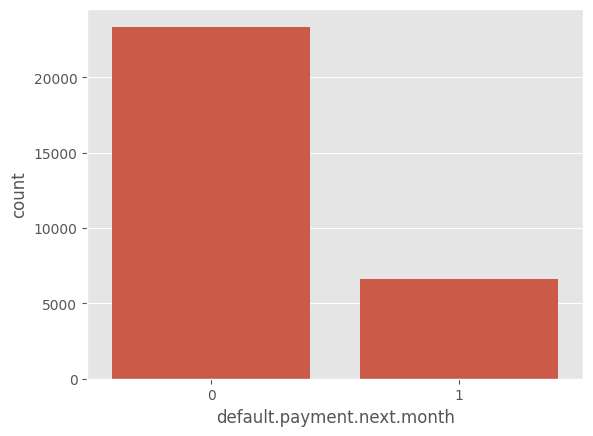

In [ ]:
sns.countplot(
    data = df, x='default.payment.next.month')

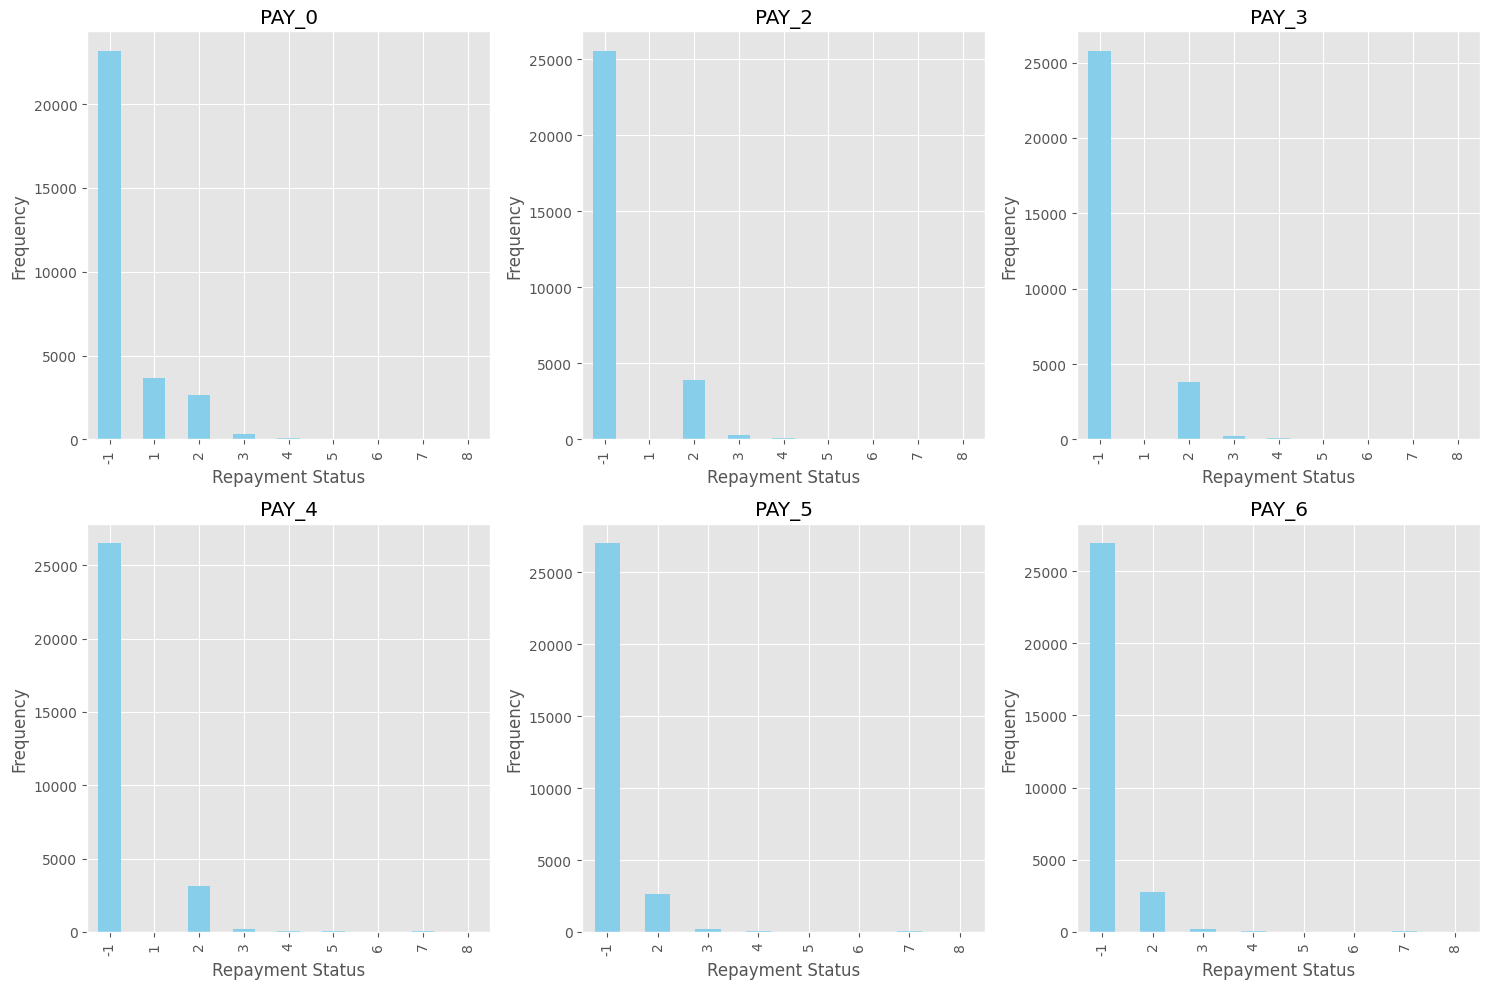

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# List of PAY_ columns
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Iterate over the columns and plot a bar plot for each
for i, column in enumerate(pay_columns):
    ax = axes[i // 3, i % 3]  # Select the current axis
    df[column].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(column)
    ax.set_xlabel('Repayment Status')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Replace values 4, 5, and 6 with 0 in the EDUCATION column
df['EDUCATION'].replace({4: 0, 5: 0, 6: 0}, inplace=True)

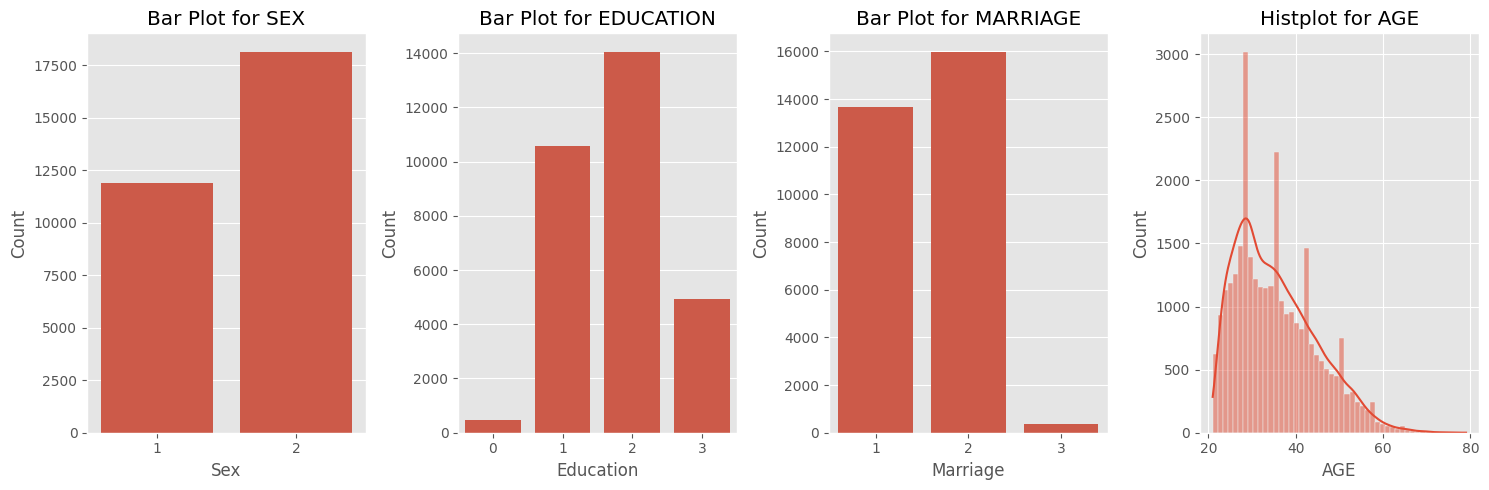

In [ ]:
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot for SEX with DEFAULT_STATUS
sns.countplot(data=df, x='SEX', ax=axs[0])
axs[0].set_title('Bar Plot for SEX')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Count')
sns.histplot(
    df['AGE'] , kde=True, bins = 50)
axs[3].set_title('Histplot for AGE')

# Plot for EDUCATION with DEFAULT_STATUS
sns.countplot(data=df, x='EDUCATION', ax=axs[1])
axs[1].set_title('Bar Plot for EDUCATION')
axs[1].set_xlabel('Education')
axs[1].set_ylabel('Count')

# Plot for MARRIAGE with DEFAULT_STATUS
sns.countplot(data=df, x='MARRIAGE', ax=axs[2])
axs[2].set_title('Bar Plot for MARRIAGE')
axs[2].set_xlabel('Marriage')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
#Convert to corect catogorical type
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['PAY_0'] = df['PAY_0'].astype('category')
df['PAY_2'] = df['PAY_2'].astype('category')
df['PAY_3'] = df['PAY_3'].astype('category')
df['PAY_4'] = df['PAY_4'].astype('category')
df['PAY_5'] = df['PAY_5'].astype('category')
df['PAY_6'] = df['PAY_6'].astype('category')
df['default.payment.next.month'] = df['default.payment.next.month'].astype('category')

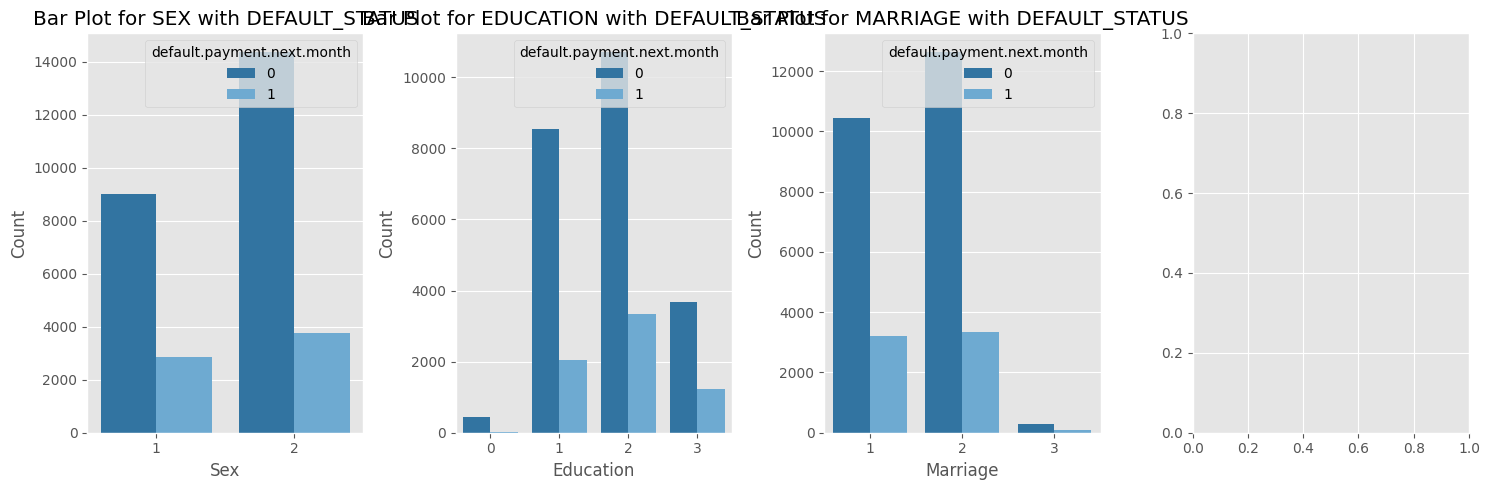

In [ ]:
import seaborn as sns
palette = ['#1f77b4', '#5DADE2']
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot for SEX with DEFAULT_STATUS
sns.countplot(data=df, x='SEX', hue='default.payment.next.month', ax=axs[0],palette=palette)
axs[0].set_title('Bar Plot for SEX with DEFAULT_STATUS')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Count')

# Plot for EDUCATION with DEFAULT_STATUS
sns.countplot(data=df, x='EDUCATION', hue='default.payment.next.month', ax=axs[1],palette=palette)
axs[1].set_title('Bar Plot for EDUCATION with DEFAULT_STATUS')
axs[1].set_xlabel('Education')
axs[1].set_ylabel('Count')

# Plot for MARRIAGE with DEFAULT_STATUS
sns.countplot(data=df, x='MARRIAGE', hue='default.payment.next.month', ax=axs[2],palette=palette)
axs[2].set_title('Bar Plot for MARRIAGE with DEFAULT_STATUS')
axs[2].set_xlabel('Marriage')
axs[2].set_ylabel('Count')
plt.tight_layout()
plt.show()




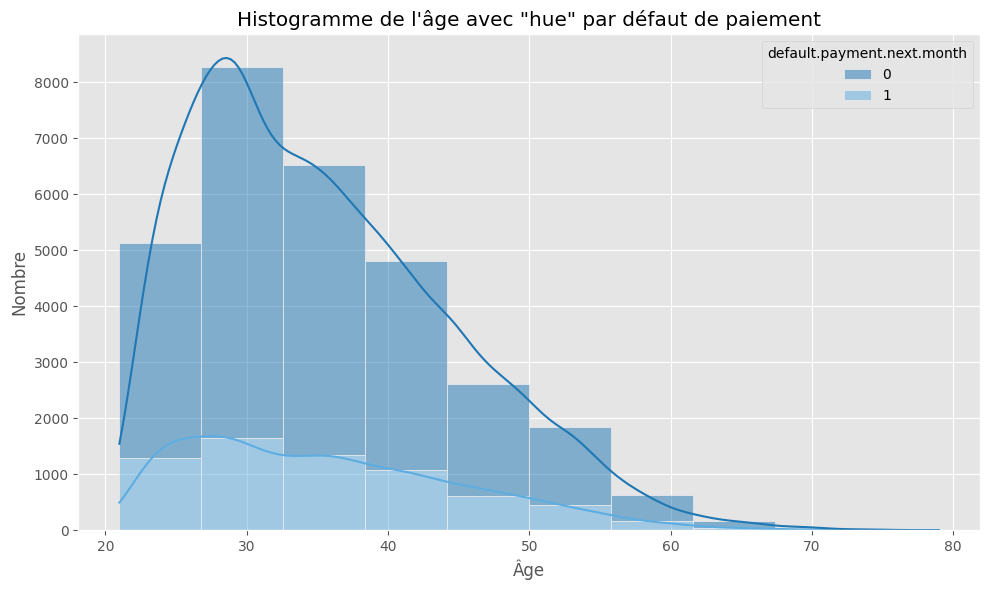

In [ ]:
# Création d'un subplot
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Histogramme avec teinte (hue) par 'default.payment.next.month'
sns.histplot(
    data=df,
    x='AGE',
    hue='default.payment.next.month',  # Séparation par 'hue'
    kde=True,  # Inclure la ligne de densité
    bins=10,  # Nombre de compartiments dans l'histogramme
    palette=['#1f77b4', '#5DADE2'],  # Deux nuances de bleu
    multiple='stack',  # Barres empilées
    ax=axs  # Assigner au subplot
)

# Configuration des étiquettes et du titre
axs.set_title('Histogramme de l\'âge avec "hue" par défaut de paiement')
axs.set_xlabel('Âge')
axs.set_ylabel('Nombre')

# Ajustement du layout pour éviter les chevauchements
plt.tight_layout()
# Affichage du graphique
plt.show()

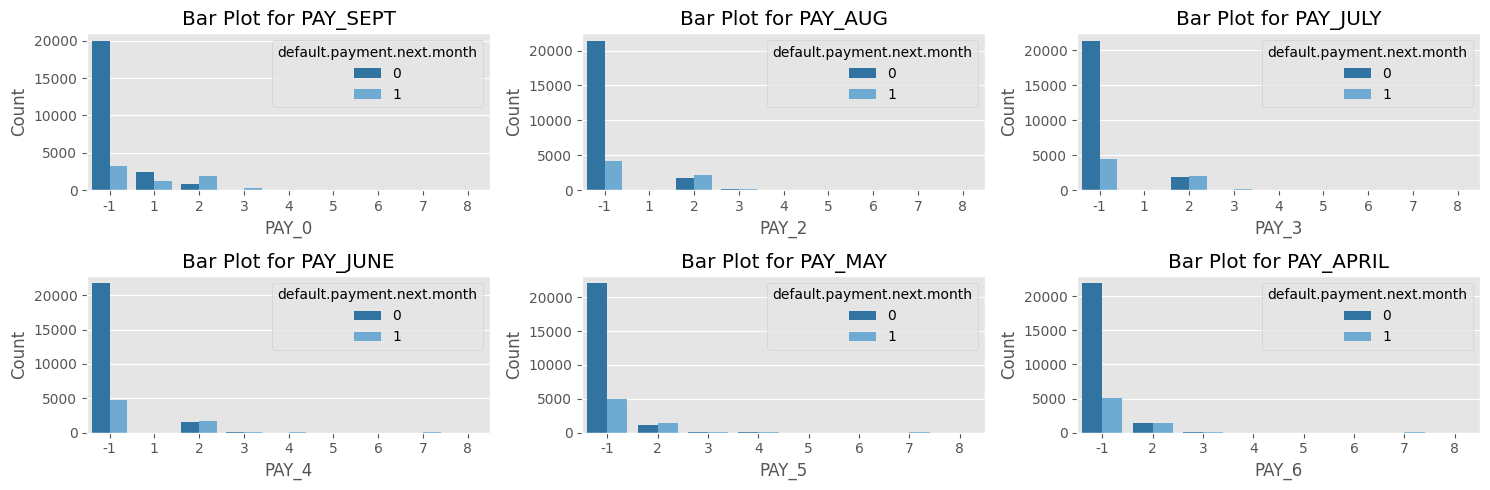

In [ ]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
palette = ['#1f77b4', '#5DADE2']

# Plot for PAY_SEPT with DEFAULT_STATUS
sns.countplot(data=df, x='PAY_0', ax=axs[0, 0], palette = palette, hue='default.payment.next.month')
axs[0, 0].set_title('Bar Plot for PAY_SEPT')
axs[0, 0].set_xlabel('PAY_0')
axs[0, 0].set_ylabel('Count')

# Plot for PAY_AUG with DEFAULT_STATUS
sns.countplot(data=df, x='PAY_2', ax=axs[0, 1], palette = palette, hue='default.payment.next.month')
axs[0, 1].set_title('Bar Plot for PAY_AUG')
axs[0, 1].set_xlabel('PAY_2')
axs[0, 1].set_ylabel('Count')

# Plot for PAY_JULY with DEFAULT_STATUS
sns.countplot(data=df, x='PAY_3', ax=axs[0, 2], palette = palette, hue='default.payment.next.month')
axs[0, 2].set_title('Bar Plot for PAY_JULY')
axs[0, 2].set_xlabel('PAY_3')
axs[0, 2].set_ylabel('Count')
# Plot for PAY_JUNE with DEFAULT_STATUS
sns.countplot(data=df, x='PAY_4', ax=axs[1, 0], palette = palette, hue='default.payment.next.month')
axs[1, 0].set_title('Bar Plot for PAY_JUNE')
axs[1, 0].set_xlabel('PAY_4')
axs[1, 0].set_ylabel('Count')

# Plot for PAY_MAY with DEFAULT_STATUS
sns.countplot(data=df, x='PAY_5', ax=axs[1, 1], palette = palette, hue='default.payment.next.month')
axs[1, 1].set_title('Bar Plot for PAY_MAY')
axs[1, 1].set_xlabel('PAY_5')
axs[1, 1].set_ylabel('Count')

# Plot for PAY_APRIL with DEFAULT_STATUS
sns.countplot(data=df, x='PAY_6', ax=axs[1, 2], palette = palette, hue='default.payment.next.month')
axs[1, 2].set_title('Bar Plot for PAY_APRIL')
axs[1, 2].set_xlabel('PAY_6')
axs[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

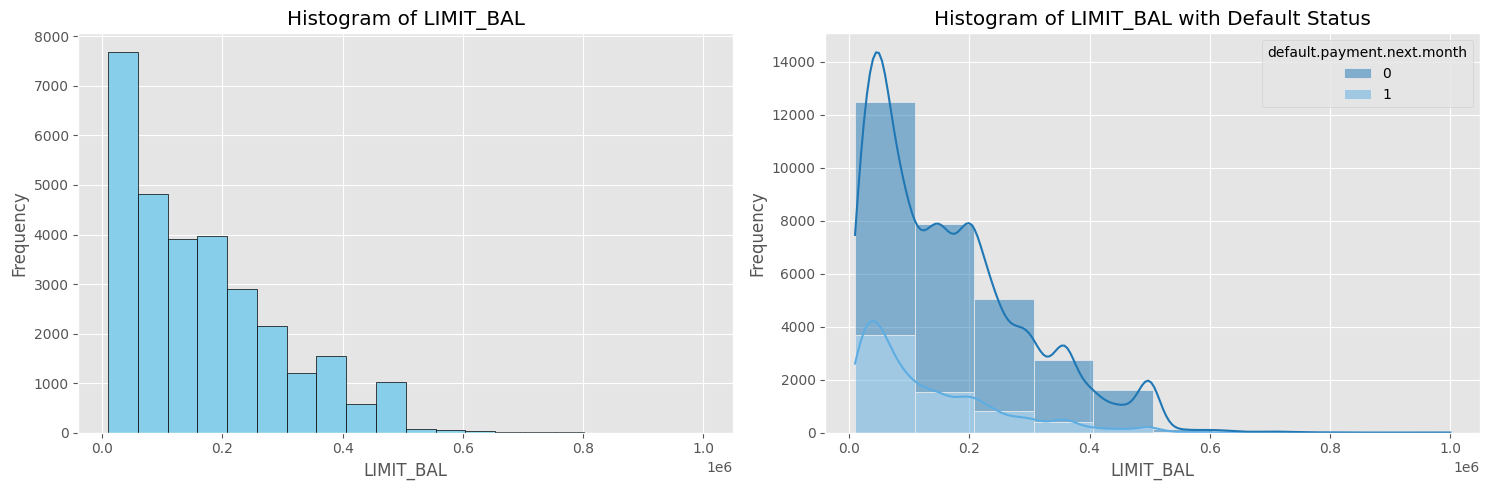

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exemples de données pour 'df'
# df = pd.DataFrame({
#     'LIMIT_BAL': [20000, 30000, 50000, 100000, 200000, ...],
#     'default.payment.next.month': [0, 1, 0, 0, 1, ...]
# })

# Créer les sous-graphes avec 1 ligne et 3 colonnes, taille du graphique 15x5
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme de LIMIT_BAL
axs[0].hist(df['LIMIT_BAL'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of LIMIT_BAL')
axs[0].set_xlabel('LIMIT_BAL')
axs[0].set_ylabel('Frequency')

# Histogramme de LIMIT_BAL avec coloration par 'default.payment.next.month'
sns.histplot(
    data=df,
    x='LIMIT_BAL',
    hue='default.payment.next.month',  # Séparation par 'hue'
    kde=True,  # Inclure la ligne de densité
    bins=10,  # Nombre de compartiments dans l'histogramme
    palette=['#1f77b4', '#5DADE2'],  # Deux nuances de bleu
    multiple='stack',  # Barres empilées
    ax=axs[1]
)

axs[1].set_title('Histogram of LIMIT_BAL with Default Status')
axs[1].set_xlabel('LIMIT_BAL')
axs[1].set_ylabel('Frequency')

# Ajustement des sous-graphes pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()

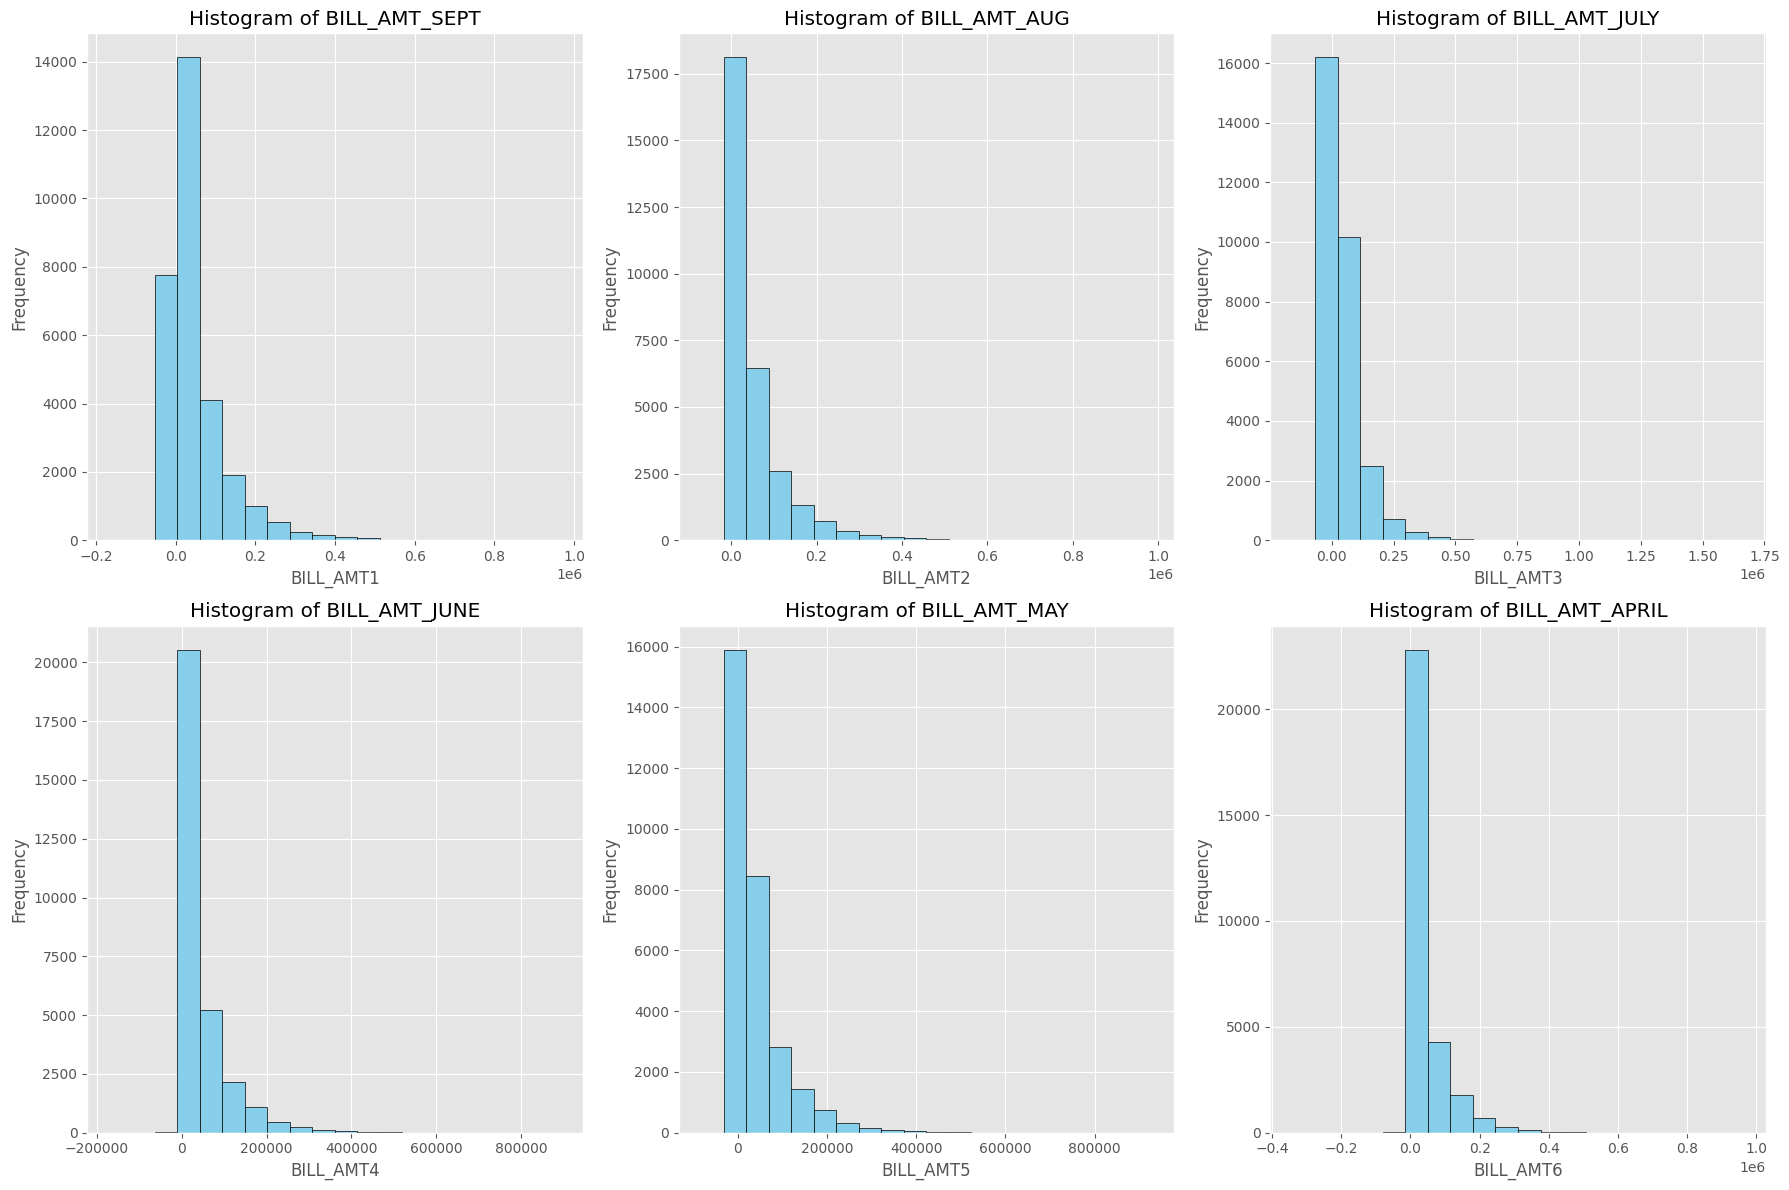

In [ ]:
plt.figure(figsize=(18, 12))

# Histogram of BILL_AMT_SEPT
plt.subplot(2, 3, 1)
plt.hist(df['BILL_AMT1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of BILL_AMT_SEPT')
plt.xlabel('BILL_AMT1')
plt.ylabel('Frequency')

# Histogram of BILL_AMT_AUG
plt.subplot(2, 3, 2)
plt.hist(df['BILL_AMT2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of BILL_AMT_AUG')
plt.xlabel('BILL_AMT2')
plt.ylabel('Frequency')

# Histogram of BILL_AMT_JULY
plt.subplot(2, 3, 3)
plt.hist(df['BILL_AMT3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of BILL_AMT_JULY')
plt.xlabel('BILL_AMT3')
plt.ylabel('Frequency')
# Histogram of BILL_AMT_JUNE
plt.subplot(2, 3, 4)
plt.hist(df['BILL_AMT4'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of BILL_AMT_JUNE')
plt.xlabel('BILL_AMT4')
plt.ylabel('Frequency')

# Histogram of BILL_AMT_MAY
plt.subplot(2, 3, 5)
plt.hist(df['BILL_AMT5'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of BILL_AMT_MAY')
plt.xlabel('BILL_AMT5')
plt.ylabel('Frequency')

# Histogram of BILL_AMT_APRIL
plt.subplot(2, 3, 6)
plt.hist(df['BILL_AMT6'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of BILL_AMT_APRIL')
plt.xlabel('BILL_AMT6')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

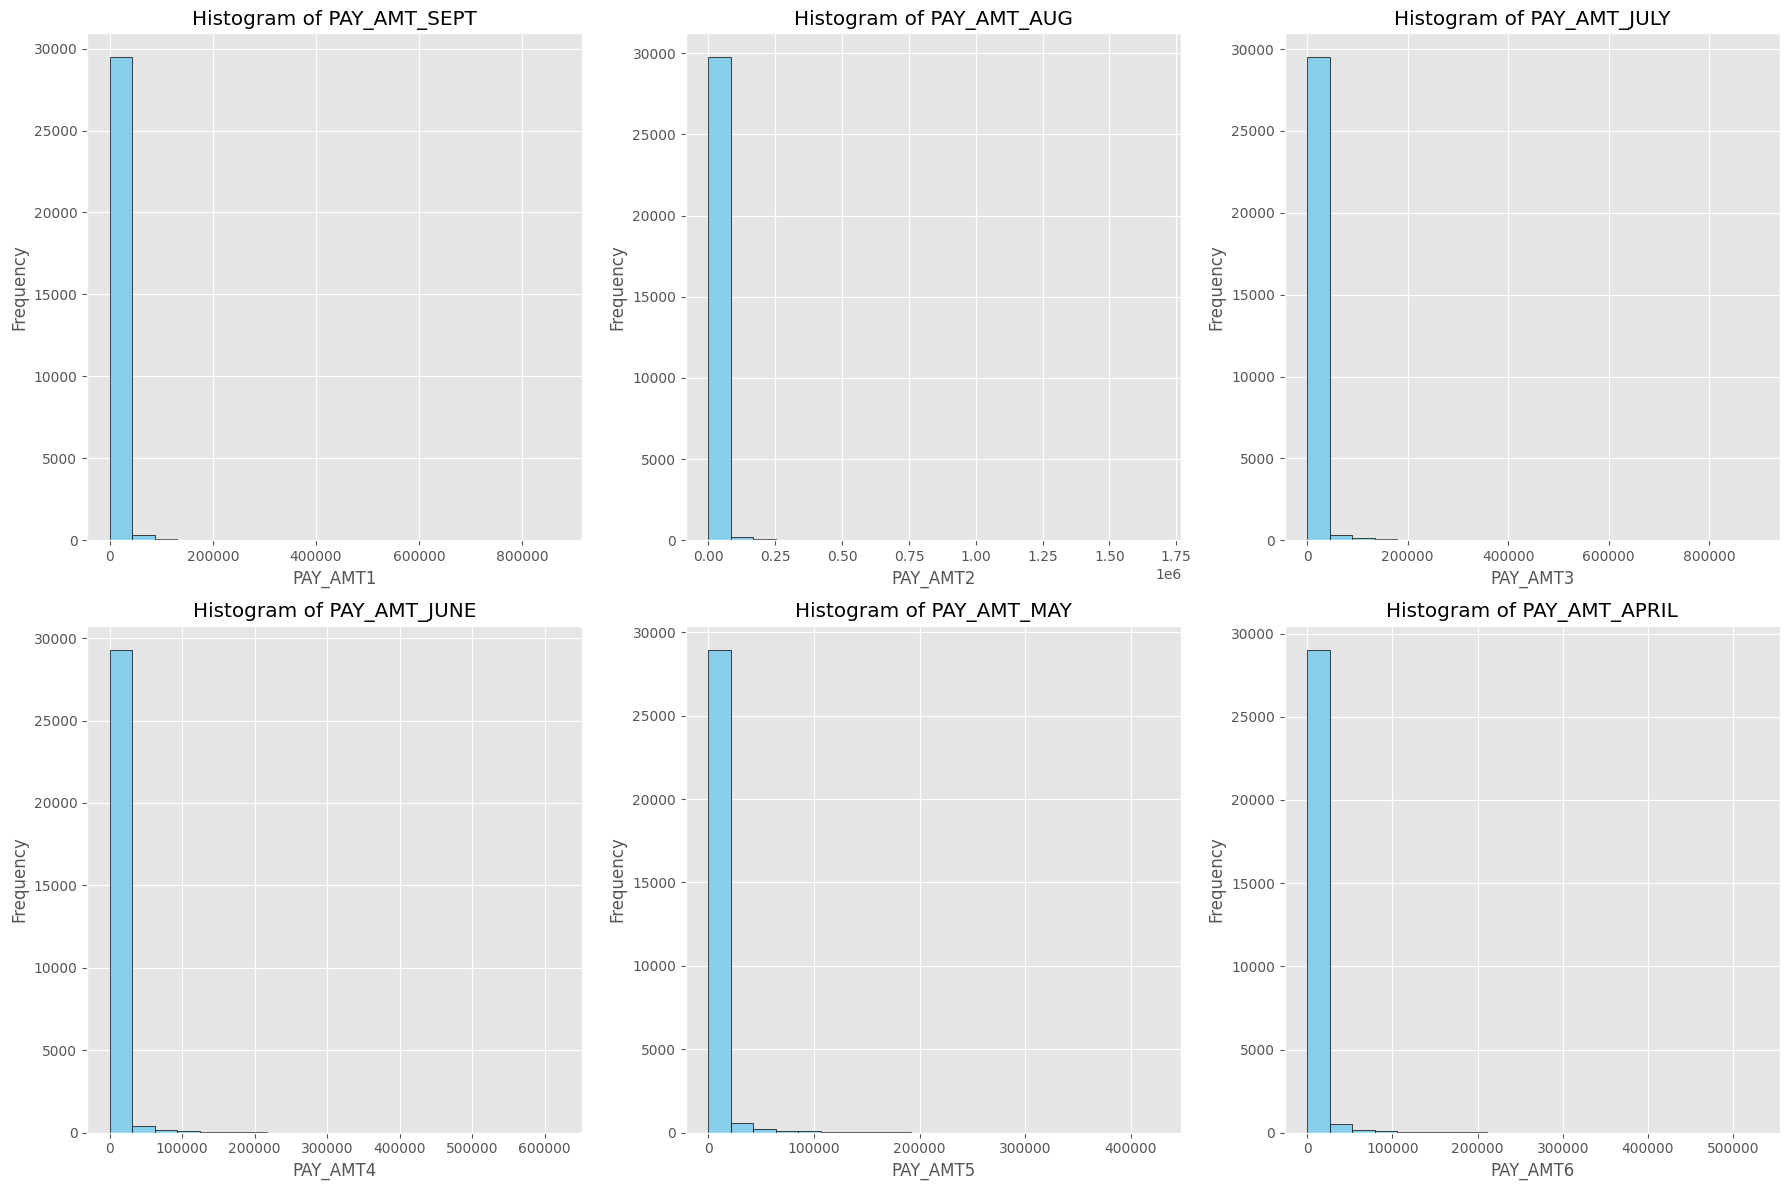

In [ ]:
plt.figure(figsize=(18, 12))

# Histogram of PAY_AMT_SEPT
plt.subplot(2, 3, 1)
plt.hist(df['PAY_AMT1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of PAY_AMT_SEPT')
plt.xlabel('PAY_AMT1')
plt.ylabel('Frequency')

# Histogram of PAY_AMT_AUG
plt.subplot(2, 3, 2)
plt.hist(df['PAY_AMT2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of PAY_AMT_AUG')
plt.xlabel('PAY_AMT2')
plt.ylabel('Frequency')

# Histogram of PAY_AMT_JULY
plt.subplot(2, 3, 3)
plt.hist(df['PAY_AMT3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of PAY_AMT_JULY')
plt.xlabel('PAY_AMT3')
plt.ylabel('Frequency')

# Histogram of PAY_AMT_JUNE
plt.subplot(2, 3, 4)
plt.hist(df['PAY_AMT4'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of PAY_AMT_JUNE')
plt.xlabel('PAY_AMT4')
plt.ylabel('Frequency')

# Histogram of PAY_AMT_MAY
plt.subplot(2, 3, 5)
plt.hist(df['PAY_AMT5'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of PAY_AMT_MAY')
plt.xlabel('PAY_AMT5')
plt.ylabel('Frequency')

# Histogram of PAY_AMT_APRIL
plt.subplot(2, 3, 6)
plt.hist(df['PAY_AMT6'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of PAY_AMT_APRIL')
plt.xlabel('PAY_AMT6')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

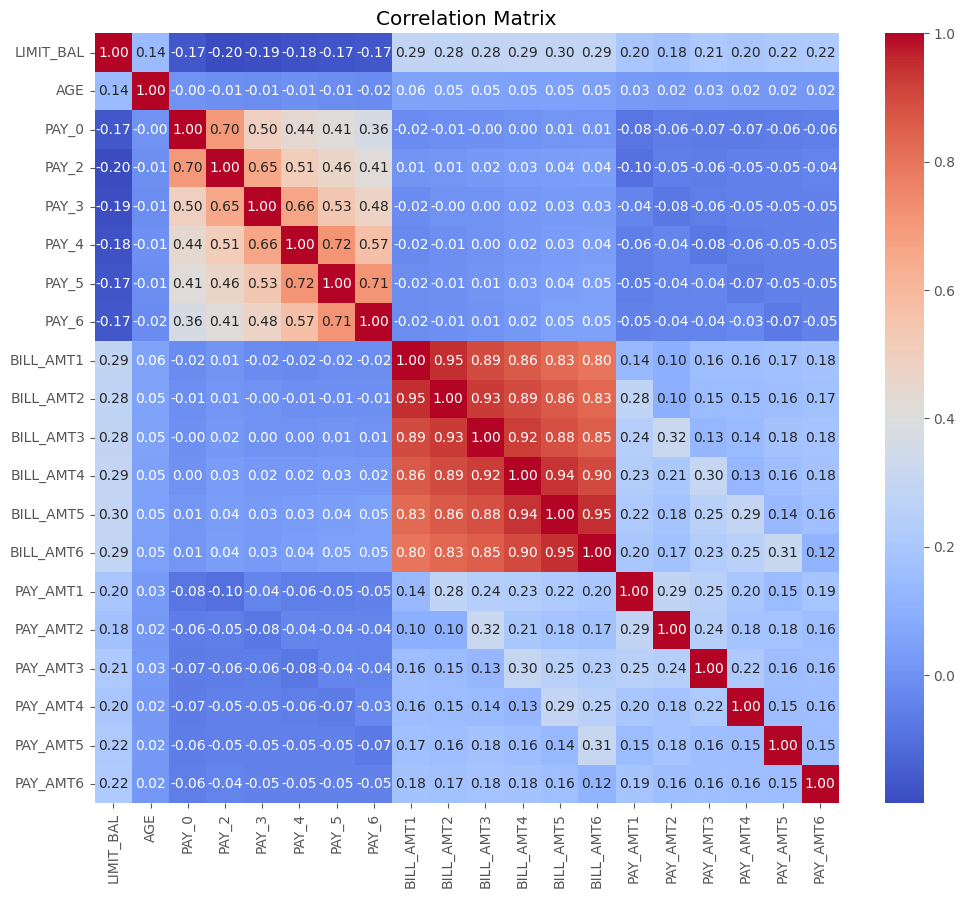

In [ ]:
#Check for correlation for continuous variables
selected_data = df[['LIMIT_BAL','AGE','PAY_0', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

# Calculate the correlation matrix
corr_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: >

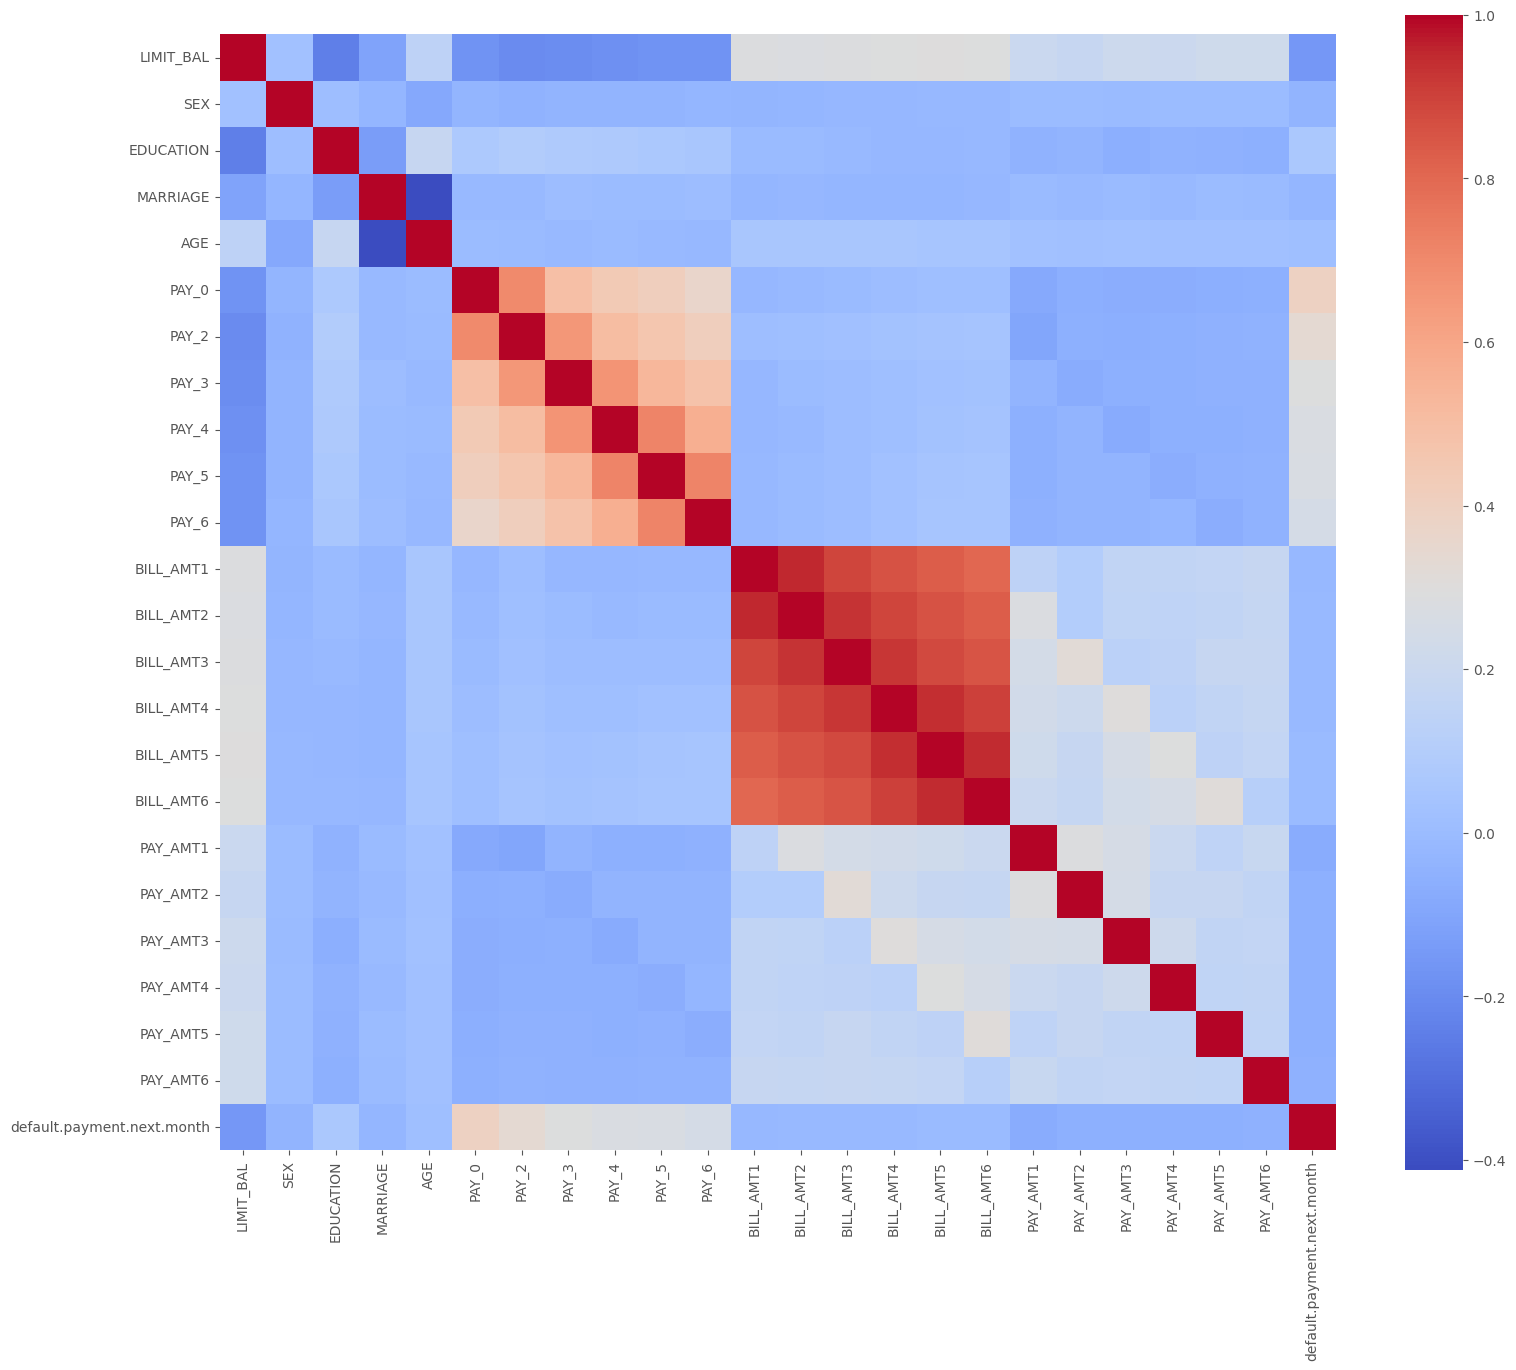

In [ ]:

plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),square=True,cmap='coolwarm')

In [ ]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  float64 
 1   SEX                         30000 non-null  category
 2   EDUCATION                   30000 non-null  category
 3   MARRIAGE                    30000 non-null  category
 4   AGE                         30000 non-null  int64   
 5   PAY_0                       30000 non-null  category
 6   PAY_2                       30000 non-null  category
 7   PAY_3                       30000 non-null  category
 8   PAY_4                       30000 non-null  category
 9   PAY_5                       30000 non-null  category
 10  PAY_6                       30000 non-null  category
 11  BILL_AMT1                   30000 non-null  float64 
 12  BILL_AMT2                   30000 non-null  float64 
 13  BILL_AMT3       

In [ ]:
df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
np.random.seed(124)

In [ ]:
#Import necessary library
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
#Set seed for reproducibility
np.random.seed(123)

#Define X and y
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Logistic Regression with 5-fold cross-validation
log_reg_cv = LogisticRegression(max_iter=1000)
log_reg_cv_scores = cross_val_score(log_reg_cv, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", log_reg_cv_scores)
print("Mean Accuracy:", log_reg_cv_scores.mean())
lr_preds = cross_val_predict(log_reg_cv, X_test, y_test, cv=5)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, lr_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_preds))

# Random Forest with 5-fold cross-validation
rf_cv = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_cv, X_train, y_train, cv=5)
print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())
rf_preds = cross_val_predict(rf_cv, X_test, y_test, cv=5)
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_preds))

# XGBoost with 5-fold cross-validation
xgb_cv = XGBClassifier(random_state=42, enable_categorical=True)
xgb_cv_scores = cross_val_score(xgb_cv, X_train, y_train, cv=5)
print("\nXGBoost Cross-Validation Scores:", xgb_cv_scores)
print("Mean Accuracy:", xgb_cv_scores.mean())
xgb_preds = cross_val_predict(xgb_cv, X_test, y_test, cv=5)
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, xgb_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_preds))

Logistic Regression Cross-Validation Scores: [0.77833333 0.77791667 0.77791667 0.778125   0.778125  ]
Mean Accuracy: 0.7780833333333333

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.67      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.72      0.50      0.44      6000
weighted avg       0.76      0.78      0.69      6000


Confusion Matrix:
 [[4686    1]
 [1311    2]]

Random Forest Cross-Validation Scores: [0.81458333 0.821875   0.81958333 0.81270833 0.80729167]
Mean Accuracy: 0.8152083333333333

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.34      0.44      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.66      60

scaling the data **texte en gras**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
# Assuming df contains the dataset with 'default.payment.next.month' as the target variable

# Separate the target variable from the features
X = df.drop(['default.payment.next.month'], axis=1) #variable independantes
y = df['default.payment.next.month'] # variable cible

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the target variable to integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Separate numerical and categorical features
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Scale numerical features
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_numerical_scaled = scaler.transform(X_test[numerical_columns])

# Concatenate scaled numerical features with categorical features
X_train_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_columns, index=X_train.index)
X_train_scaled_df = pd.concat([X_train_scaled_df, X_train[categorical_columns]], axis=1)

X_test_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_columns, index=X_test.index)
X_test_scaled_df = pd.concat([X_test_scaled_df, X_test[categorical_columns]], axis=1)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
log_reg.fit(X_train_scaled_df, y_train)

# Predict on the testing set
y_pred = log_reg.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7811666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000


Confusion Matrix:
 [[4687    0]
 [1313    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for class 1 (default)
y_proba = log_reg.predict_proba(X_test_scaled_df)[:, 1]

# Calculate Gini index
gini_index = 2 * roc_auc_score(y_test, y_proba) - 1

print("Gini Index:", gini_index)
y_proba

Gini Index: 0.3193183459751827


array([0.2854735 , 0.22122339, 0.3087352 , ..., 0.30035946, 0.28012924,
       0.1372224 ])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the target variable from the features
X = data.drop(['default.payment.next.month'], axis=1)
y = data['default.payment.next.month']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the target variable to integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Separate numerical and categorical features
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Scale numerical features
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_numerical_scaled = scaler.transform(X_test[numerical_columns])

# Concatenate scaled numerical features with categorical features
X_train_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_columns, index=X_train.index)
X_train_scaled_df = pd.concat([X_train_scaled_df, X_train[categorical_columns]], axis=1)

X_test_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_columns, index=X_test.index)
X_test_scaled_df = pd.concat([X_test_scaled_df, X_test[categorical_columns]], axis=1)
# Assuming X_train_scaled_df and y_train are already prepared

# 3. Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled_df, y_train)

# 4. Evaluate its performance
y_pred_rf = rf_classifier.predict(X_test_scaled_df)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# Additional evaluation metrics
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))


Accuracy (Random Forest): 0.7841666666666667

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      4687
           1       0.52      0.21      0.30      1313

    accuracy                           0.78      6000
   macro avg       0.66      0.58      0.58      6000
weighted avg       0.75      0.78      0.75      6000


Confusion Matrix (Random Forest):
 [[4433  254]
 [1041  272]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the target variable from the features
X = data.drop(['default.payment.next.month'], axis=1)
y = data['default.payment.next.month']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the target variable to integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Separate numerical and categorical features
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Scale numerical features
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_numerical_scaled = scaler.transform(X_test[numerical_columns])

# Concatenate scaled numerical features with categorical features
X_train_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_columns, index=X_train.index)
X_train_scaled_df = pd.concat([X_train_scaled_df, X_train[categorical_columns]], axis=1)

X_test_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_columns, index=X_test.index)
X_test_scaled_df = pd.concat([X_test_scaled_df, X_test[categorical_columns]], axis=1)







In [ ]:
# XGBoost with 5-fold cross-validation
xgb_cv = XGBClassifier(random_state=42, enable_categorical=True)
xgb_cv_scores = cross_val_score(xgb_cv, X_train_scaled_df, y_train , cv=5)
print("\nXGBoost Cross-Validation Scores:", xgb_cv_scores)
print("Mean Accuracy:", xgb_cv_scores.mean())
xgb_preds = cross_val_predict(xgb_cv, X_test_scaled_df, y_test, cv=5)
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, xgb_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_preds))


XGBoost Cross-Validation Scores: [0.77854167 0.786875   0.789375   0.78291667 0.77958333]
Mean Accuracy: 0.7834583333333333

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      4687
           1       0.46      0.22      0.30      1313

    accuracy                           0.77      6000
   macro avg       0.64      0.58      0.58      6000
weighted avg       0.73      0.77      0.74      6000


Confusion Matrix:
 [[4345  342]
 [1019  294]]


*********************/************************************************

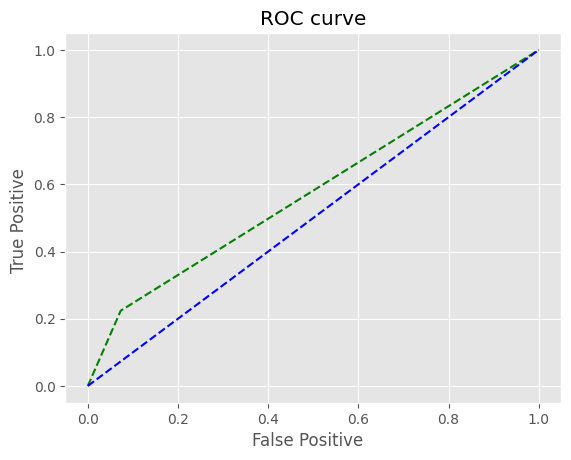

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report,confusion_matrix,roc_curve
# roc curve
fpr, tpr , thresh = roc_curve(y_test,xgb_preds,pos_label=1)

#roc curve when tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr,_ = roc_curve(y_test,random_probs,pos_label=1)
plt.style.use('ggplot')

plt.plot(fpr,tpr,linestyle='--', color = 'green',label = 'XGBClassifer')
plt.plot(p_fpr,p_tpr, linestyle='--', color = 'blue')
plt.title('ROC curve')
plt.xlabel('False Positive  ')
plt.ylabel('True Positive ')
plt.show()

***********************************************************************************************************************************************************************************************************************************************************************************************

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for class 1 (default)
y_proba_rf = rf_classifier.predict_proba(X_test_scaled_df)[:, 1]

# Calculate Gini index
gini_index_rf = 2 * roc_auc_score(y_test, y_proba_rf) - 1
y_proba_rf
print("Gini Index (XGBoost):", gini_index_rf)



Gini Index (XGBoost): 0.4053486243406965
